In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
root = '/gdrive/My Drive/Wtech/6/'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /gdrive
/gdrive


In [2]:
train_set = pd.read_csv(root+"StudentsPerformance.csv")

Bu ödevde de [Öğrencilerin Sınav Performansı](https://www.kaggle.com/spscientist/students-performance-in-exams/home)'na  ait verileri kullanacaksınız. 

Bu ödevi tamamlamak için, aşağıdaki soruların çözümlerini içeren Jupyter notebook dosyasının Github linkini gönderin. Kafanıza takılan konuları mentörünüzle konuşabilir ya da ofis saatinde Slack üzerinden sorabilirsiniz.


1. Sınav sonuçları normal dağılımlı mıdır? Değilse normal dağılıma sahip hale getirmek için ne yapabiliriz? 

2. Üç sınav sonucunu tek bir değişkende, hedef değişkeni olarak tutmak istiyoruz. Bunun için üç sınavın ortalamasını içeren yeni bir değişken tanımlayın. Bu yeni değişkenin ortalamasının normal dağılımlı olup olmadığını test edin. Eğer normal dağılıma sahip değilse dönüşüm yaparak normal dağılımlı hale getirmeye çalışın ve dönüşümün sonucunu test edin. 

3. Bir önceki soruda oluşturduğumuz hedef değişkeni ile hangi değişkenler ilişkili görünüyor? Eğer amacımız sınav başarısını belirleyen etkenleri açıklamak olsaydı hangi değişkenleri veri kümemizde tutmamız gerekirdi?

In [3]:
train_set

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


1. Sınav sonuçları normal dağılımlı mıdır? Değilse normal dağılıma sahip hale getirmek için ne yapabiliriz?

In [4]:
scores = train_set.loc[:, ["math score", "reading score", "writing score"]]

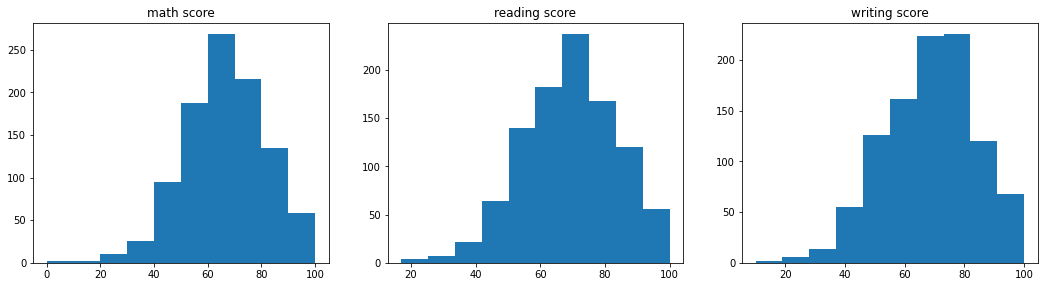

In [9]:
plt.figure(figsize=(18,15))
degiskenler = ["math score", "reading score", "writing score"]
for i in range(3):
  plt.subplot(3, 3, i+1)
  plt.hist(scores[degiskenler[i]])
  plt.title(degiskenler[i])

Normal Dağılımlılardır. Olmasaydı winsorize yada log, karekök transform yapılabilirdi.

2. Üç sınav sonucunu tek bir değişkende, hedef değişkeni olarak tutmak istiyoruz. Bunun için üç sınavın ortalamasını içeren yeni bir değişken tanımlayın. Bu yeni değişkenin ortalamasının normal dağılımlı olup olmadığını test edin. Eğer normal dağılıma sahip değilse dönüşüm yaparak normal dağılımlı hale getirmeye çalışın ve dönüşümün sonucunu test edin.

In [11]:
train_set["performans"] = (train_set["math score"] + train_set["reading score"]+ train_set["writing score"]) / 3

Text(0.5, 1.0, 'performans')

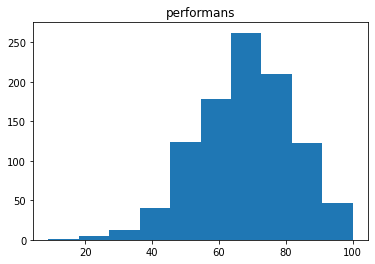

In [12]:
plt.hist(train_set["performans"])
plt.title("performans")

Normal Dağılımlıdır.

3. Bir önceki soruda oluşturduğumuz hedef değişkeni ile hangi değişkenler ilişkili görünüyor? Eğer amacımız sınav başarısını belirleyen etkenleri açıklamak olsaydı hangi değişkenleri veri kümemizde tutmamız gerekirdi?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0.5, 1.0, 'test preparation course - performans')

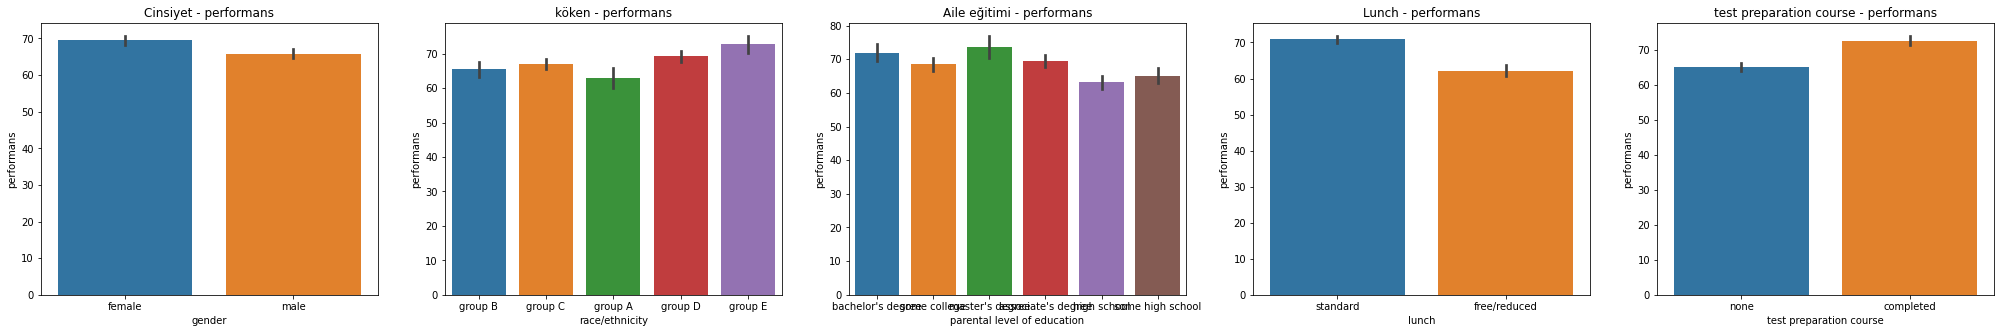

In [15]:
plt.figure(figsize=(35,5))
plt.subplot(1,5,1)
sns.barplot(train_set["gender"], train_set["performans"])
plt.title("Cinsiyet - performans")

plt.subplot(1,5,2)
sns.barplot(train_set["race/ethnicity"], train_set["performans"])
plt.title("köken - performans")

plt.subplot(1,5,3)
sns.barplot(train_set["parental level of education"], train_set["performans"])
plt.title("Aile eğitimi - performans")

plt.subplot(1,5,4)
sns.barplot(train_set["lunch"], train_set["performans"])
plt.title("Lunch - performans")

plt.subplot(1,5,5)
sns.barplot(train_set["test preparation course"], train_set["performans"])
plt.title("test preparation course - performans")


Tüm değişkenler sınav başarında etkili olarak gözüküyor. Tüm verilerin tutulması gerekiyor.